In [4]:
import pandas as pd

In [5]:
revcsv = pd.read_csv('user_reviews.csv')

In [24]:
import re
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

In [9]:
revcsv.head()

,title,user_review_link,user_review,sentiment
0,Planet Earth II,https://www.imdb.com/review/rw3577042/,As Planet Earth I was released about ten years...,negative
1,Planet Earth,https://www.imdb.com/review/rw2014827/,I'm just laughing at all these negative commen...,positive
2,Planet Earth,https://www.imdb.com/review/rw1594404/,I don't think I can add anything to the previo...,negative
3,Band of Brothers,https://www.imdb.com/review/rw0625888/,"""Band of Brothers"" in a word is awesome. I cou...",positive
4,Band of Brothers,https://www.imdb.com/review/rw0626113/,I am an 80 year old combat veteran (88th Inf. ...,negative


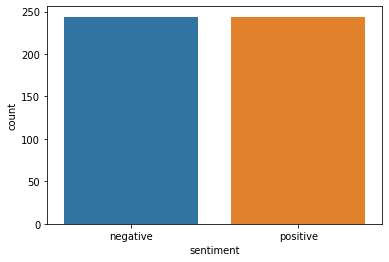

In [16]:
sns.countplot(x='sentiment', data=revcsv)

In [10]:
from nltk.tokenize import RegexpTokenizer

In [11]:
tokenizer = RegexpTokenizer('\w+')

In [12]:
tokens = tokenizer.tokenize(revcsv['user_review'][1])
tokens[:10]

['I',
 'm',
 'just',
 'laughing',
 'at',
 'all',
 'these',
 'negative',
 'comments',
 'I']

In [13]:
def tok(review):
    tokenizer = RegexpTokenizer('\w+')
    tokens = tokenizer.tokenize(review)
    return(tokens)

In [14]:
revcsv['chuncks'] = revcsv['user_review'].apply(tok)

In [15]:
revcsv.head()

,title,user_review_link,user_review,sentiment,chuncks
0,Planet Earth II,https://www.imdb.com/review/rw3577042/,As Planet Earth I was released about ten years...,negative,"[As, Planet, Earth, I, was, released, about, t..."
1,Planet Earth,https://www.imdb.com/review/rw2014827/,I'm just laughing at all these negative commen...,positive,"[I, m, just, laughing, at, all, these, negativ..."
2,Planet Earth,https://www.imdb.com/review/rw1594404/,I don't think I can add anything to the previo...,negative,"[I, don, t, think, I, can, add, anything, to, ..."
3,Band of Brothers,https://www.imdb.com/review/rw0625888/,"""Band of Brothers"" in a word is awesome. I cou...",positive,"[Band, of, Brothers, in, a, word, is, awesome,..."
4,Band of Brothers,https://www.imdb.com/review/rw0626113/,I am an 80 year old combat veteran (88th Inf. ...,negative,"[I, am, an, 80, year, old, combat, veteran, 88..."


In [16]:
import nltk
from nltk.corpus import stopwords

In [17]:
stopw = nltk.corpus.stopwords.words('english')
stopw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [59]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
def rmsw(chunk):
    wns = []
    for word in chunk:
        word = word.lower()
        if word not in stopw:
            wns.append(word)
    return(wns)

In [19]:
revcsv['chuncks'] = revcsv['chuncks'].apply(rmsw)

In [20]:
revcsv.head()

,title,user_review_link,user_review,sentiment,chuncks
0,Planet Earth II,https://www.imdb.com/review/rw3577042/,As Planet Earth I was released about ten years...,negative,"[planet, earth, released, ten, years, ago, vis..."
1,Planet Earth,https://www.imdb.com/review/rw2014827/,I'm just laughing at all these negative commen...,positive,"[laughing, negative, comments, know, hard, pet..."
2,Planet Earth,https://www.imdb.com/review/rw1594404/,I don't think I can add anything to the previo...,negative,"[think, add, anything, previous, 10, 10, comme..."
3,Band of Brothers,https://www.imdb.com/review/rw0625888/,"""Band of Brothers"" in a word is awesome. I cou...",positive,"[band, brothers, word, awesome, wait, see, epi..."
4,Band of Brothers,https://www.imdb.com/review/rw0626113/,I am an 80 year old combat veteran (88th Inf. ...,negative,"[80, year, old, combat, veteran, 88th, inf, di..."


In [117]:
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [133]:
lemmatizer = WordNetLemmatizer()
for i in range(len(revcsv['chuncks'][1])):
    print(lemmatizer.lemmatize(revcsv['chuncks'][1][i],pos="v"))

laugh
negative
comment
know
hard
peta
freak
believe
circle
life
precious
animals
actually
kill
movie
statement
show
planet
earth
kind
simple
think
al
gore
make
movie
show
image
planet
happen
animal
world
make
micheal
moore
film
show
beautiful
image
planet
mean
goodness
watch
instead
make
big
deal
everything
definitely
recommend
film
anyone
interest
see
go
nature


In [21]:
revcsv['newrev'] = [" ".join(txt) for txt in revcsv['chuncks'].values]

In [22]:
revcsv.head()

,title,user_review_link,user_review,sentiment,chuncks,newrev
0,Planet Earth II,https://www.imdb.com/review/rw3577042/,As Planet Earth I was released about ten years...,negative,"[planet, earth, released, ten, years, ago, vis...",planet earth released ten years ago visual imp...
1,Planet Earth,https://www.imdb.com/review/rw2014827/,I'm just laughing at all these negative commen...,positive,"[laughing, negative, comments, know, hard, pet...",laughing negative comments know hard peta frea...
2,Planet Earth,https://www.imdb.com/review/rw1594404/,I don't think I can add anything to the previo...,negative,"[think, add, anything, previous, 10, 10, comme...",think add anything previous 10 10 comments giv...
3,Band of Brothers,https://www.imdb.com/review/rw0625888/,"""Band of Brothers"" in a word is awesome. I cou...",positive,"[band, brothers, word, awesome, wait, see, epi...",band brothers word awesome wait see episode co...
4,Band of Brothers,https://www.imdb.com/review/rw0626113/,I am an 80 year old combat veteran (88th Inf. ...,negative,"[80, year, old, combat, veteran, 88th, inf, di...",80 year old combat veteran 88th inf div italy ...


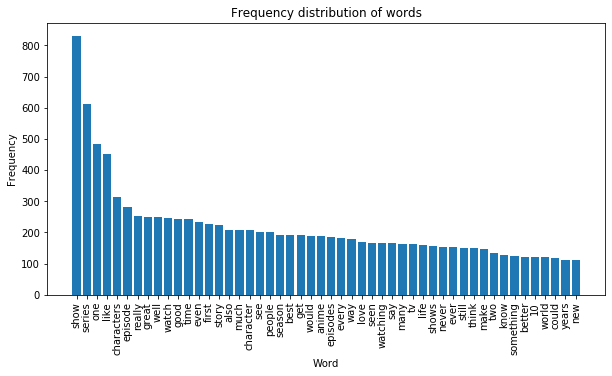

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vect_texts = vectorizer.fit_transform(list(revcsv['newrev']))
all_ngrams = vectorizer.get_feature_names()
num_ngrams = min(50, len(all_ngrams))
all_counts = vect_texts.sum(axis=0).tolist()[0]

all_ngrams, all_counts = zip(*[(n, c) for c, n in sorted(zip(all_counts, all_ngrams), reverse=True)])
ngrams = all_ngrams[:num_ngrams]
counts = all_counts[:num_ngrams]

idx = np.arange(num_ngrams)


plt.figure(figsize=(10, 5))
plt.bar(idx, counts, width=0.8)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Frequency distribution of words')
plt.xticks(idx, ngrams, rotation=90)
plt.show()

In [26]:
df = revcsv
df.head()

,title,user_review_link,user_review,sentiment,chuncks,newrev
0,Planet Earth II,https://www.imdb.com/review/rw3577042/,As Planet Earth I was released about ten years...,negative,"[planet, earth, released, ten, years, ago, vis...",planet earth released ten years ago visual imp...
1,Planet Earth,https://www.imdb.com/review/rw2014827/,I'm just laughing at all these negative commen...,positive,"[laughing, negative, comments, know, hard, pet...",laughing negative comments know hard peta frea...
2,Planet Earth,https://www.imdb.com/review/rw1594404/,I don't think I can add anything to the previo...,negative,"[think, add, anything, previous, 10, 10, comme...",think add anything previous 10 10 comments giv...
3,Band of Brothers,https://www.imdb.com/review/rw0625888/,"""Band of Brothers"" in a word is awesome. I cou...",positive,"[band, brothers, word, awesome, wait, see, epi...",band brothers word awesome wait see episode co...
4,Band of Brothers,https://www.imdb.com/review/rw0626113/,I am an 80 year old combat veteran (88th Inf. ...,negative,"[80, year, old, combat, veteran, 88th, inf, di...",80 year old combat veteran 88th inf div italy ...


In [27]:
df['sentiment'] = np.array(list(map(lambda x: 1 if x == 'positive' else 0,df['sentiment'])))

In [28]:
df.head()

,title,user_review_link,user_review,sentiment,chuncks,newrev
0,Planet Earth II,https://www.imdb.com/review/rw3577042/,As Planet Earth I was released about ten years...,0,"[planet, earth, released, ten, years, ago, vis...",planet earth released ten years ago visual imp...
1,Planet Earth,https://www.imdb.com/review/rw2014827/,I'm just laughing at all these negative commen...,1,"[laughing, negative, comments, know, hard, pet...",laughing negative comments know hard peta frea...
2,Planet Earth,https://www.imdb.com/review/rw1594404/,I don't think I can add anything to the previo...,0,"[think, add, anything, previous, 10, 10, comme...",think add anything previous 10 10 comments giv...
3,Band of Brothers,https://www.imdb.com/review/rw0625888/,"""Band of Brothers"" in a word is awesome. I cou...",1,"[band, brothers, word, awesome, wait, see, epi...",band brothers word awesome wait see episode co...
4,Band of Brothers,https://www.imdb.com/review/rw0626113/,I am an 80 year old combat veteran (88th Inf. ...,0,"[80, year, old, combat, veteran, 88th, inf, di...",80 year old combat veteran 88th inf div italy ...


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [30]:
def ngram_vectorize(texts, labels):
    kwargs = {
        'ngram_range' : (1,2),
        'dtype' : 'int32',
        'strip_accents' : 'unicode',
        'decode_error' : 'replace',
        'analyzer' : 'word',
        'min_df' : 2,
    }
  
    tfidf_vectorizer = TfidfVectorizer(**kwargs)
    transformed_texts = tfidf_vectorizer.fit_transform(texts)
       
    selector = SelectKBest(f_classif, k=min(1000, transformed_texts.shape[1]))
    selector.fit(transformed_texts, labels)
    transformed_texts = selector.transform(transformed_texts).astype('float32')
    return transformed_texts
vect_data = ngram_vectorize(df['newrev'], df['sentiment'])
print(vect_data)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


  (0, 176)	0.13305454
  (0, 286)	0.13305454
  (0, 429)	0.09858641
  (0, 564)	0.17376019
  (0, 868)	0.13305454
  (0, 871)	0.13305454
  (0, 900)	0.1629258
  (0, 905)	0.112977
  (0, 991)	0.06070726
  (1, 27)	0.08770849
  (1, 51)	0.14462884
  (1, 162)	0.14462884
  (1, 370)	0.13990569
  (1, 390)	0.10094172
  (1, 423)	0.25334492
  (1, 457)	0.12194932
  (1, 521)	0.15786207
  (1, 564)	0.09821229
  (1, 648)	0.1504095
  (1, 833)	0.1504095
  (2, 0)	0.1958223
  (2, 79)	0.12909366
  (2, 95)	0.061501555
  (2, 519)	0.1342534
  (2, 535)	0.1342534
  :	:
  (485, 582)	0.22397274
  (485, 980)	0.17298517
  (486, 80)	0.14967422
  (486, 103)	0.12886296
  (486, 110)	0.14967422
  (486, 115)	0.13712735
  (486, 282)	0.11365816
  (486, 285)	0.10307731
  (486, 381)	0.11776133
  (486, 475)	0.1426082
  (486, 498)	0.11014333
  (486, 753)	0.042665076
  (486, 917)	0.14967422
  (486, 952)	0.067538194
  (487, 149)	0.049962357
  (487, 272)	0.10378972
  (487, 279)	0.078725
  (487, 323)	0.12204644
  (487, 410)	0.115017496
 

In [31]:
vect_data.shape

(488, 1000)

In [32]:
tfidf = TfidfVectorizer()
tr_texts = tfidf.fit_transform(df['newrev'])
tr_texts.shape

(488, 10879)

In [33]:
X = vect_data.toarray()
y = (np.array(df['sentiment']))

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [36]:
print ('trdata shape'+ str(X_train.shape))
print ('tstdata shape'+ str(X_test.shape))

trdata shape(390, 1000)
tstdata shape(98, 1000)


In [37]:
from tensorflow import keras
from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [38]:
model = keras.Sequential()
model.add(Dropout(rate=0.2, input_shape=X_train.shape[1:]))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(rate=0.2))   
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               100100    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 100,201
Trainable params: 100,201
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
Early_Stoping_Monitor = EarlyStopping( patience=2)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),validation_split=0.3, callbacks=Early_Stoping_Monitor)

Epoch 1/10
9/9 [==============================] - 4s 108ms/step - loss: 0.6930 - accuracy: 0.5391 - val_loss: 0.6912 - val_accuracy: 0.6752
Epoch 2/10
9/9 [==============================] - 0s 12ms/step - loss: 0.6870 - accuracy: 0.7845 - val_loss: 0.6879 - val_accuracy: 0.7778
Epoch 3/10
9/9 [==============================] - 0s 12ms/step - loss: 0.6796 - accuracy: 0.8768 - val_loss: 0.6835 - val_accuracy: 0.8462
Epoch 4/10
9/9 [==============================] - 0s 14ms/step - loss: 0.6706 - accuracy: 0.9442 - val_loss: 0.6769 - val_accuracy: 0.8547
Epoch 5/10
9/9 [==============================] - 0s 13ms/step - loss: 0.6592 - accuracy: 0.9346 - val_loss: 0.6678 - val_accuracy: 0.8632
Epoch 6/10
9/9 [==============================] - 0s 13ms/step - loss: 0.6437 - accuracy: 0.9596 - val_loss: 0.6556 - val_accuracy: 0.8803
Epoch 7/10
9/9 [==============================] - 0s 11ms/step - loss: 0.6245 - accuracy: 0.9704 - val_loss: 0.6407 - val_accuracy: 0.9060
Epoch 8/10
9/9 [==========

In [41]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

4/4 [==============================] - 0s 3ms/step - loss: 0.5958 - accuracy: 0.8980
Test loss: 0.5958171486854553
Test accuracy: 0.8979591727256775


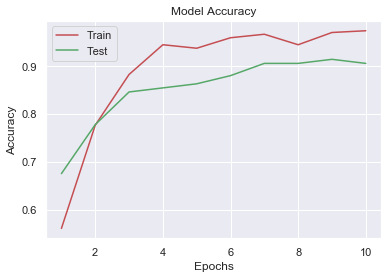

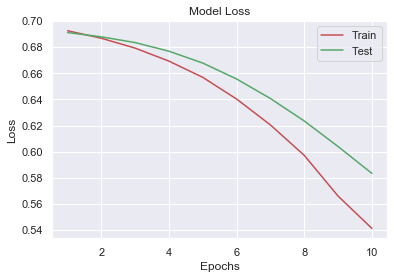

In [45]:
def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1,len(accuracy) + 1)
     
    plt.figure(1)
    plt.plot(epochs, accuracy, 'r', label='Train')
    plt.plot(epochs, val_accuracy, 'g', label='Test')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.figure(2)
    plt.plot(epochs, loss, 'r', label='Train')
    plt.plot(epochs, val_loss, 'g', label='Test')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history)